In [1]:
import pandas as pd
import polyflexmd.data_analysis.data.read as read
import polyflexmd.data_analysis.transform.transform as transform
import polyflexmd.data_analysis.data.types as types
import numpy as np
import pymatgen.io.lammps.data
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sns.set_style("darkgrid")

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick label
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick label
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
df_traj_raw = read.read_raw_trajectory_df(path=pathlib.Path("/home/egor/Projects/polyflexmd/data/1montest/data/raw/polymer.out"))
df_traj_raw

,t,id,type,x,y,z,ix,iy,iz
0,0,1,1,0.000000,0.000000,0.000000,0,0,0
1,0,2,1,0.000000,0.000000,0.000000,0,0,0
2,0,3,1,0.000000,0.000000,0.000000,0,0,0
3,0,4,1,0.000000,0.000000,0.000000,0,0,0
4,0,5,1,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...
155095,5050000,96,1,-98.130501,-75.350899,25.677999,1,0,0
155096,5050000,97,1,79.106400,64.737198,6.112250,0,2,0
155097,5050000,98,1,92.217003,67.587700,-40.913399,0,0,0
155098,5050000,99,1,-92.977699,42.227600,-62.144100,0,1,1


In [3]:
def read_lammps_system_data(
        path: pathlib.Path,
        atom_style: str = "angle",
        molecule_id_type: np.dtype = np.uint16,
        atom_id_type: np.dtype = np.uint32
) -> types.LammpsSystemData:
    """
    Reads a LAMMPS data file and returns a dictionary with the header information
    and a pandas DataFrame with the atom coordinates and bonds information.
    """
    content = pymatgen.io.lammps.data.LammpsData.from_file(
        str(path),
        atom_style=atom_style,
        sort_id=False
    )

    content.atoms.rename({
        "nx": "ix",
        "ny": "iy",
        "nz": "iz"
    }, axis=1, inplace=True)

    content.atoms["molecule-ID"] = content.atoms["molecule-ID"].astype(molecule_id_type)
    content.atoms.index = content.atoms.index.astype(atom_id_type)

    return types.LammpsSystemData(
        box=content.box,
        masses=content.masses,
        atoms=content.atoms,
        angles=None,
        bonds=None
    )

system_df = read_lammps_system_data(
    atom_style="angle",
    path=pathlib.Path("/home/egor/Projects/polyflexmd/data/1montest/initial_system.data")
)
system_df.atoms

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.0,0.0,0.0,0,0,0
2,2,1,0.0,0.0,0.0,0,0,0
3,3,1,0.0,0.0,0.0,0,0,0
4,4,1,0.0,0.0,0.0,0,0,0
5,5,1,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...
96,96,1,0.0,0.0,0.0,0,0,0
97,97,1,0.0,0.0,0.0,0,0,0
98,98,1,0.0,0.0,0.0,0,0,0
99,99,1,0.0,0.0,0.0,0,0,0


In [4]:
df_traj_unf = transform.unfold_coordinates_df(df_traj_raw, system_df)
df_traj_unf

,t,id,type,x,y,z,ix,iy,iz
0,0,1,1,0.000000,0.000000,0.000000,0,0,0
1,0,2,1,0.000000,0.000000,0.000000,0,0,0
2,0,3,1,0.000000,0.000000,0.000000,0,0,0
3,0,4,1,0.000000,0.000000,0.000000,0,0,0
4,0,5,1,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...
155095,5050000,96,1,101.869499,-75.350899,25.677999,1,0,0
155096,5050000,97,1,79.106400,464.737198,6.112250,0,2,0
155097,5050000,98,1,92.217003,67.587700,-40.913399,0,0,0
155098,5050000,99,1,-92.977699,242.227600,137.855900,0,1,1


In [5]:
df_traj_unf = transform.join_raw_trajectory_df_with_system_data(df_traj_unf, system_df)
df_traj_unf

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,0.000000,0.000000,0.000000,0,0,0,2
2,0,3,1,0.000000,0.000000,0.000000,0,0,0,3
3,0,4,1,0.000000,0.000000,0.000000,0,0,0,4
4,0,5,1,0.000000,0.000000,0.000000,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
155095,5050000,96,1,101.869499,-75.350899,25.677999,1,0,0,96
155096,5050000,97,1,79.106400,464.737198,6.112250,0,2,0,97
155097,5050000,98,1,92.217003,67.587700,-40.913399,0,0,0,98
155098,5050000,99,1,-92.977699,242.227600,137.855900,0,1,1,99


In [6]:
import polyflexmd.data_analysis.transform.msdlm as msdlm
df_traj_unf["type"] = 3
df_traj_lm = df_traj_unf.groupby(["t", "molecule-ID"]).apply(msdlm.extract_lm)
df_traj_lm

x           y           z
t       molecule-ID                                    
0       1              0.000000    0.000000    0.000000
        2              0.000000    0.000000    0.000000
        3              0.000000    0.000000    0.000000
        4              0.000000    0.000000    0.000000
        5              0.000000    0.000000    0.000000
...                         ...         ...         ...
5050000 96           101.869499  -75.350899   25.677999
        97            79.106400  464.737198    6.112250
        98            92.217003   67.587700  -40.913399
        99           -92.977699  242.227600  137.855900
        100         -239.924099 -271.383904  175.689899

[155100 rows x 3 columns]

In [7]:
df_msdlm = msdlm.calculate_msd_lm_df(df_traj_lm, [])
df_msdlm

,dr_N^2,delta dr_N^2
t,,
0,0.000000e+00,0.000000e+00
1,2.253224e-08,4.022942e-09
2,1.939995e-07,4.130091e-08
3,7.235800e-07,1.672574e-07
4,1.765505e-06,3.908881e-07
...,...,...
5010000,7.495807e+04,2.059001e+04
5020000,7.518674e+04,2.064592e+04
5030000,7.584045e+04,2.109917e+04


In [8]:
df_msdlm["t/LJ"] = df_msdlm.index * 0.0025
df_msdlm["t/LJ"] = df_msdlm["t/LJ"] - df_msdlm["t/LJ"].min()
df_msdlm

,dr_N^2,delta dr_N^2,t/LJ
t,,,
0,0.000000e+00,0.000000e+00,0.0000
1,2.253224e-08,4.022942e-09,0.0025
2,1.939995e-07,4.130091e-08,0.0050
3,7.235800e-07,1.672574e-07,0.0075
4,1.765505e-06,3.908881e-07,0.0100
...,...,...,...
5010000,7.495807e+04,2.059001e+04,12525.0000
5020000,7.518674e+04,2.064592e+04,12550.0000
5030000,7.584045e+04,2.109917e+04,12575.0000


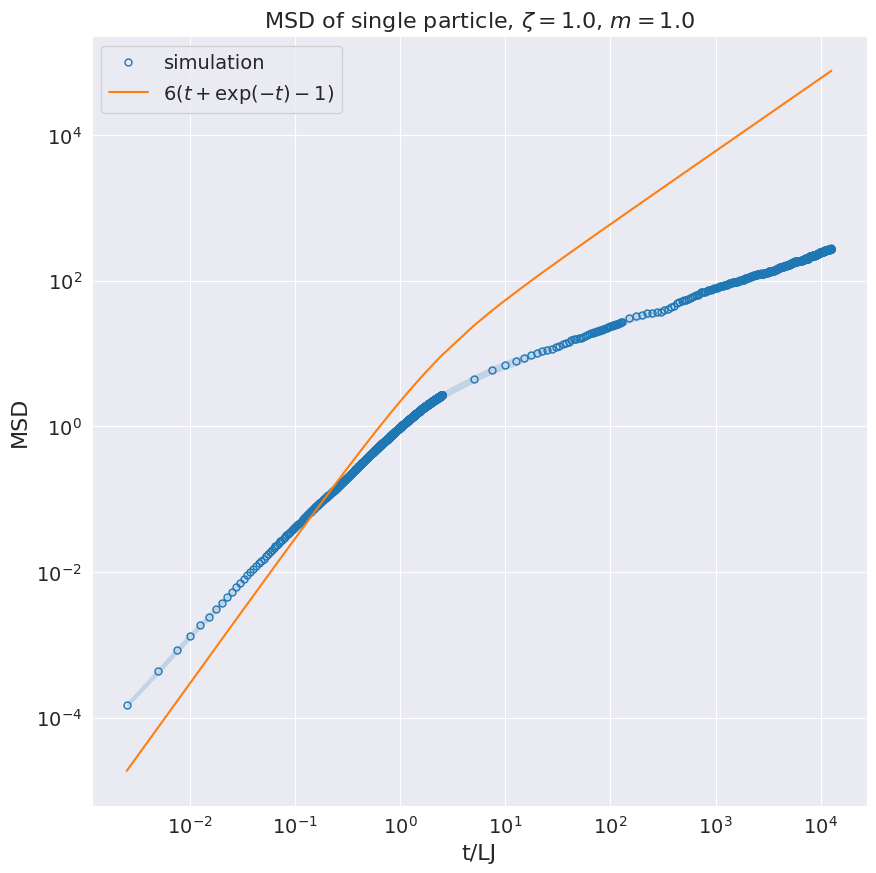

In [9]:
import polyflexmd.data_analysis.plot.msd as plot_msd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

def msd_theory(t):
    return 6 * (t + np.exp(-t) - 1)

df_theory = df_msdlm.copy()
df_theory["dr_N^2"] = msd_theory(df_msdlm["t/LJ"])

plot_msd.plot_MSD(df_msdlm, log_scale=True, l_K=0, L_contour=1, zeta_e=1.0, zeta=1, col="dr_N^2", scatter=True, ylabel="MSD", label="simulation")

ax.plot(df_theory["t/LJ"].iloc[1:], df_theory["dr_N^2"].iloc[1:], label="$6 (t+\exp(-t)-1)$")

ax.set(title="MSD of single particle, $\zeta=1.0$, $m=1.0$")

ax.legend()

ValueError: x and y must be the same size

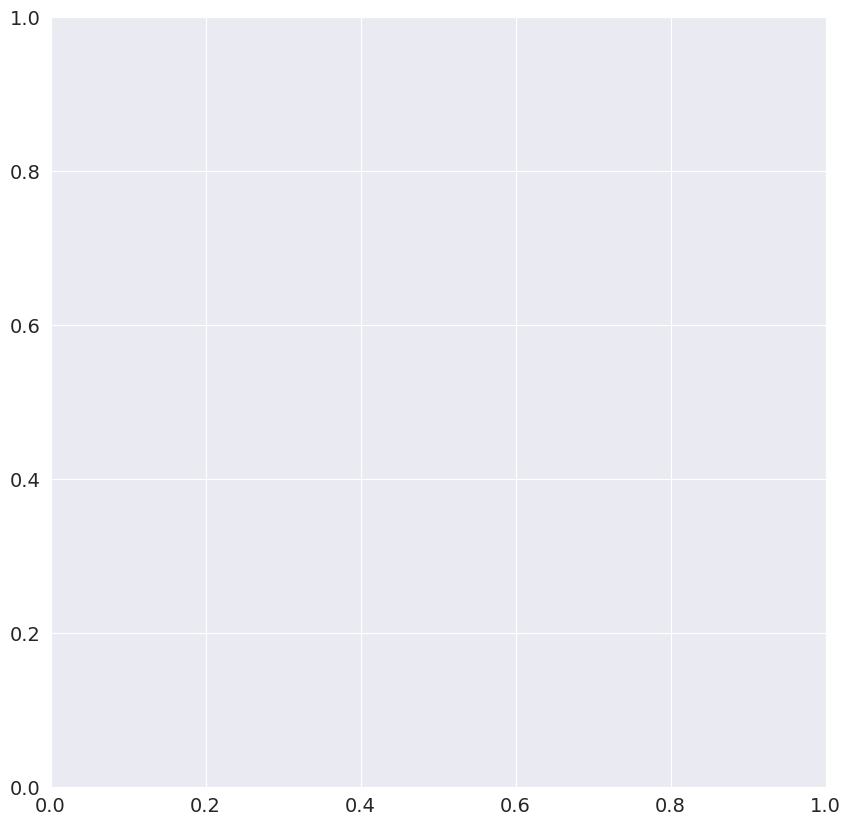

In [10]:
alpha_theory = msdlm.calculate_msd_alpha_df(df_theory, 7)
alpha_sim = msdlm.calculate_msd_alpha_df(df_msdlm, 7)

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(alpha_theory.index, alpha_theory, label="theory")
ax.scatter(alpha_sim.index, alpha_sim, label="simulation")

ax.set(
    xscale="log",
    xlabel="t/LJ",
    ylabel="$\\alpha$",
    title="$\\alpha$ of single particle, $\zeta=1.0$, $m=1.0$"
)